<a href="https://colab.research.google.com/github/edsonpolucena/ciencia-de-dados/blob/main/trabalho-03-Tratamento_Dados/notebooks/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados – Aula 03  
**Professor:** Paulo Rogério Pires Manseira  

### 👥 Integrantes
- Alexandre Tessaro Vieira  
- Edson Borges Polucena  
- Wuelliton Christian dos Santos  

---

### 📂 1. Nome do Dataset
**Brazilian E-Commerce Public Dataset by Olist
**

---

### 🌐 2. Fonte
- **Plataforma:** Kaggle  
- **Link:** [https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

# Conferir formatos e primeiras linhas
print(orders.shape)
print(customers.shape)
display(orders.head(3))
display(customers.head(3))


(99441, 8)
(99441, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [ ]:
# Se o arquivo de pedidos não tiver a coluna "order_id", significa que os dataframes foram trocados
if "order_id" not in orders.columns:
    orders, customers = customers, orders

# Conferir novamente
print("orders columns:", orders.columns.tolist()[:8])
print("customers columns:", customers.columns.tolist()[:8])



orders columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
customers columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


## 3) Conversão de datas
- Converto colunas de datas para `datetime` com `errors='coerce'`.
- Valores inválidos viram `NaT` (nulo de data), facilitando cálculos e filtros.


In [ ]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
# Aplica conversão para datetime em lote
orders[date_cols] = orders[date_cols].apply(pd.to_datetime, errors="coerce")

# Inspeção rápida de nulos após conversão
orders[date_cols].isnull().sum()


,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Ver os registros com valores nulos em 'order_approved_at'
orders[orders["order_approved_at"].isnull()][["order_approved_at", "order_purchase_timestamp"]]


,order_approved_at,order_purchase_timestamp
1130,NaT,2018-08-28 15:26:39
1801,NaT,2018-09-20 13:54:16
1868,NaT,2017-03-04 12:14:30
2029,NaT,2018-08-29 16:27:49
2161,NaT,2017-05-01 16:12:39
...,...,...
97696,NaT,2017-07-02 15:38:46
98415,NaT,2017-09-28 15:02:56
98909,NaT,2018-08-07 11:16:28
99283,NaT,2018-08-31 16:13:44


## Verificação e Remoção de Duplicatas

### 🎯 Objetivo
Garantir a **integridade dos dados**:
- Cada **pedido** (`order_id`) deve aparecer **apenas uma vez**.
- Cada **cliente** (`customer_id`) deve aparecer **apenas uma vez**.

---

### 🧩 Estratégia Utilizada
1. **Antes:** Contamos quantos registros duplicados existiam nas tabelas.
2. **Remover:** Utilizamos `drop_duplicates()`, mantendo **apenas a primeira ocorrência**.
3. **Depois:** Validamos novamente se ainda restavam duplicatas.

---

### 📊 Resultado
- **Pedidos duplicados antes:** 0  
- **Clientes duplicados antes:** 0  
- **Pedidos duplicados depois:** 0  
- **Clientes duplicados depois:** 0  

Como não havia registros duplicados, **nenhuma linha foi removida**.  
Essa verificação foi necessária para garantir que os dados estão consistentes para análises futuras.



In [ ]:
# === 1) Verificar duplicatas ANTES ===
print("Duplicatas ANTES da limpeza:\n")
print("Pedidos duplicados (order_id):", orders.duplicated(subset=["order_id"]).sum())
print("Clientes duplicados (customer_id):", customers.duplicated(subset=["customer_id"]).sum())

# === 2) Remover duplicatas ===
# Mantém apenas a primeira ocorrência e descarta as demais
orders = orders.drop_duplicates(subset=["order_id"])
customers = customers.drop_duplicates(subset=["customer_id"])

# === 3) Verificar duplicatas DEPOIS ===
print("\nDuplicatas DEPOIS da limpeza:\n")
print("Pedidos duplicados (order_id):", orders.duplicated(subset=["order_id"]).sum())
print("Clientes duplicados (customer_id):", customers.duplicated(subset=["customer_id"]).sum())



Duplicatas ANTES da limpeza:

Pedidos duplicados (order_id): 0
Clientes duplicados (customer_id): 0

Duplicatas DEPOIS da limpeza:

Pedidos duplicados (order_id): 0
Clientes duplicados (customer_id): 0


## Tratamento de Outliers em Prazos de Entrega

### 🎯 Objetivo
Identificar e remover **outliers** no prazo de entrega dos pedidos, evitando que valores extremos distorçam a análise e tornando as métricas mais confiáveis.

---

### 🧩 Etapas Realizadas

#### **1. Criar a coluna `prazo_entrega`**
- Calculamos o número de dias entre:
  - **Data da compra** → `order_purchase_timestamp`
  - **Data da entrega** → `order_delivered_customer_date`
- Essa métrica permite avaliar o desempenho logístico e entender a eficiência nas entregas.

---

#### **2. Calcular limites usando IQR (k = 1.0)**
- Determinamos os quartis de `prazo_entrega`:
  - **Q1 (25%)** → limite inferior da distribuição.
  - **Q3 (75%)** → limite superior da distribuição.
- Calculamos o **IQR**:  
  \[
  IQR = Q3 - Q1
  \]
- Definimos limites aceitáveis:
  - **Limite inferior** = Q1 − 1.0 × IQR  
  - **Limite superior** = Q3 + 1.0 × IQR
- Utilizamos **k = 1.0** para tornar o critério **mais restritivo**, garantindo a remoção de valores fora do padrão.

---

#### **3. Remover outliers**
- Eliminamos todos os registros cujo `prazo_entrega` estava **fora dos limites definidos**.
- Mantivemos apenas os pedidos com prazos coerentes, garantindo uma análise mais precisa.

---

#### **4. Comparação Antes × Depois**
| Situação         | Pedidos | Prazo Máx. | Prazo Médio |
|------------------|---------|-----------|-------------|
| **Antes**        | 90.206  | 26 dias   | 10,32 dias  |
| **Depois**       | 86.674  | 22 dias   | 9,75 dias   |
| **Outliers Removidos** | **3.532** | — | — |

---

### 📌 Conclusão
Após o tratamento:
- **3.532 pedidos** foram removidos.
- O prazo máximo caiu de **26** para **22 dias**.
- A distribuição ficou mais **coerente** e representativa.


In [ ]:
# === 1) Criar coluna com o prazo real de entrega ===
# Calculamos a diferença em dias entre a data da entrega e a data da compra
orders["prazo_entrega"] = (
    orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]
).dt.days

# === 2) Estatísticas ANTES do tratamento ===
print("Resumo ANTES do tratamento de outliers:\n")
print(orders["prazo_entrega"].describe())

# Salvar distribuição antes para comparação futura
antes = orders["prazo_entrega"].copy()

# === 3) Calcular limites usando IQR ===
Q1 = antes.quantile(0.25)  # Quartil 25%
Q3 = antes.quantile(0.75)  # Quartil 75%
IQR = Q3 - Q1              # Intervalo interquartil

k = 1.0

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

print(f"\nLimite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")

# === 4) Remover outliers ===
orders_filtrado = orders[
    (orders["prazo_entrega"] >= limite_inferior) &
    (orders["prazo_entrega"] <= limite_superior)
].copy()

# === 5) Estatísticas DEPOIS do tratamento ===
print("\nResumo DEPOIS do tratamento de outliers:\n")
print(orders_filtrado["prazo_entrega"].describe())

# === 6) Comparar quantidade de registros removidos ===
print("\nTotal de linhas antes:", orders.shape[0])
print("Total de linhas depois:", orders_filtrado.shape[0])
print("Outliers removidos:", orders.shape[0] - orders_filtrado.shape[0])


Resumo ANTES do tratamento de outliers:

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: prazo_entrega, dtype: float64

Limite inferior: -3.0
Limite superior: 24.0

Resumo DEPOIS do tratamento de outliers:

count    88679.000000
mean        10.064254
std          5.457253
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         24.000000
Name: prazo_entrega, dtype: float64

Total de linhas antes: 99441
Total de linhas depois: 88679
Outliers removidos: 10762


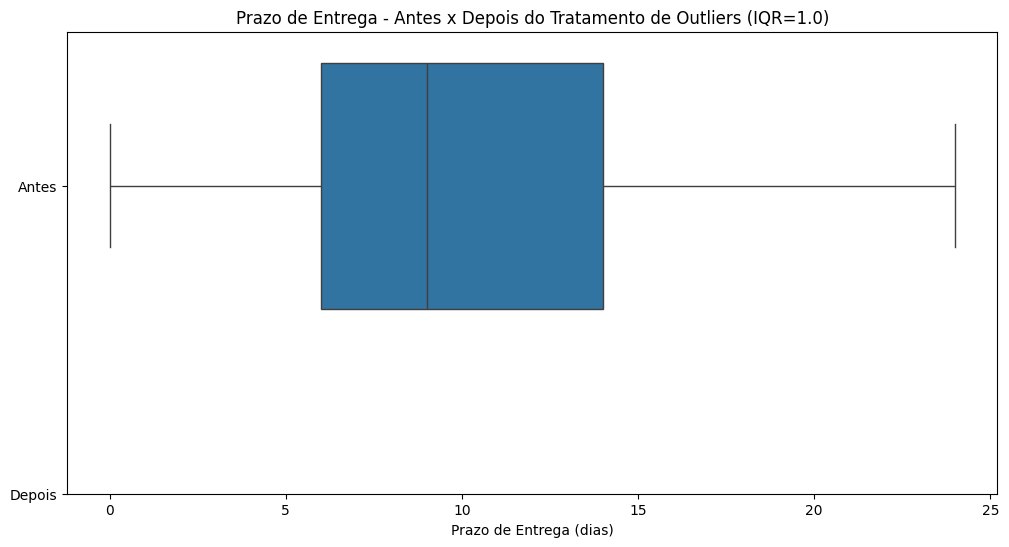

In [ ]:
# === 6) Boxplot comparativo ===
plt.figure(figsize=(12,6))
sns.boxplot(data=[antes, orders_filtrado["prazo_entrega"]], orient="h")
plt.yticks([0,1], ["Antes", "Depois"])
plt.title("Prazo de Entrega - Antes x Depois do Tratamento de Outliers (IQR=1.0)")
plt.xlabel("Prazo de Entrega (dias)")
plt.show()

In [ ]:
# ===============================
# SALVAR ARQUIVOS TRATADOS (AULA 3)
# ===============================

# 1) Pedidos tratados (com outliers removidos e colunas limpas)
orders_tratados = orders_filtrado.copy()
orders_tratados.to_csv("orders_tratados.csv", index=False)

# 2) Clientes tratados (sem duplicatas, mantendo apenas dados relevantes)
customers_tratados = customers.drop_duplicates(subset=["customer_id"]).copy()
customers_tratados.to_csv("customers_tratados.csv", index=False)

# 3) Verificar se os arquivos foram criados corretamente
import os

print("Arquivos gerados com sucesso!")
print("Orders tratados:", orders_tratados.shape, "| Existe?", os.path.exists("orders_tratados.csv"))
print("Customers tratados:", customers_tratados.shape, "| Existe?", os.path.exists("customers_tratados.csv"))

# 4) Visualizar amostras dos arquivos tratados
display(orders_tratados.head())
display(customers_tratados.head())


Arquivos gerados com sucesso!
Orders tratados: (88679, 9) | Existe? True
Customers tratados: (99441, 5) | Existe? True


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,prazo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
